In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats


# Metoda najmniejszych kwadratów

### Idea

**Cel:** Znaleźć najlepszą linię prostą $y = ax + b$ do danych

**Jak?** Minimalizując sumę **kwadratów odchyleń** punktów od linii

$$\text{Minimalizuj: } SSE = \sum_{i=1}^{n}(y_i - \hat{y}_i)^2 = \sum_{i=1}^{n}(y_i - (ax_i + b))^2$$

gdzie:
- $y_i$ = rzeczywista wartość
- $\hat{y}_i = ax_i + b$ = wartość przewidziana przez model
- $(y_i - \hat{y}_i)$ = **residual** (reszta, błąd)

---

### Dlaczego kwadraty?

✅ **Zalety kwadratów:**
- Błędy dodatnie i ujemne się nie znoszą
- Większe kary za duże odchylenia
- Matematycznie wygodne (funkcja różniczkowalna)
- Rozwiązanie analityczne istnieje!

**Wzory na parametry:**
$$a = \frac{\sum(x_i - \bar{x})(y_i - \bar{y})}{\sum(x_i - \bar{x})^2}$$

$$b = \bar{y} - a\bar{x}$$

slope: 1.88, intercept: 5.13


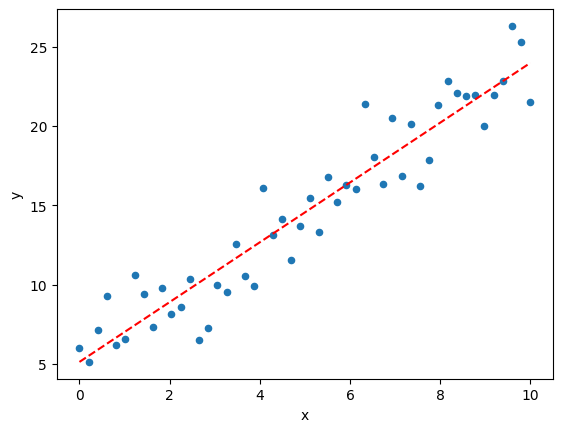

In [3]:
# Ustawienie seed dla powtarzalności
np.random.seed(42)

# Generowanie danych: y ≈ 2x + 5 + szum
n = 50
x = np.linspace(0, 10, n)
y_true = 2 * x + 5  # prawdziwa zależność
noise = np.random.normal(0, 2, n)  # losowy szum
y = y_true + noise

# Stworzenie DataFrame
data = pd.DataFrame({'x': x, 'y': y})


slope, intercept, r_value, p_value, std_err = stats.linregress(data.x, data.y)
print(f"slope: {slope:.2f}, intercept: {intercept:.2f}")
fig, ax = plt.subplots()
data.plot(kind="scatter", x='x', y='y', ax=ax)
y_linreg = slope*x + intercept
ax.plot(x, y_linreg, 'r--')

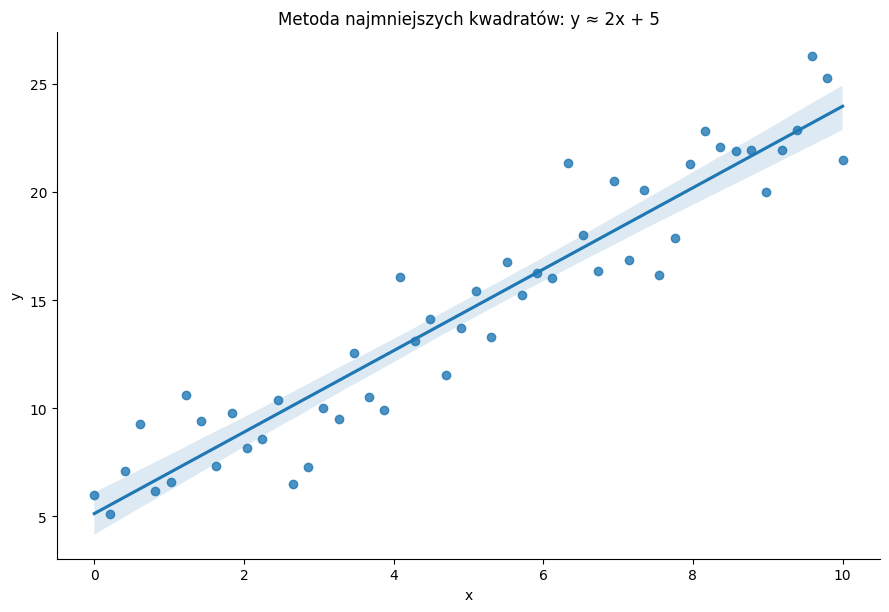

In [ ]:
# Ustawienie seed dla powtarzalności
np.random.seed(42)

# Generowanie danych: y ≈ 2x + 5 + szum
n = 50
x = np.linspace(0, 10, n)
y_true = 2 * x + 5  # prawdziwa zależność
noise = np.random.normal(0, 2, n)  # losowy szum
y = y_true + noise

# Stworzenie DataFrame
data = pd.DataFrame({'x': x, 'y': y})

# Wykres z dopasowaniem linii prostej
sns.lmplot(data=data, x='x', y='y', height=6, aspect=1.5)
plt.title('Metoda najmniejszych kwadratów: y ≈ 2x + 5')
plt.show()

# Metoda najmniejszych kwadratów metodą macierzową

Nachylenie (a): 0.5999999999999999
Wyraz wolny (b): 2.200000000000003


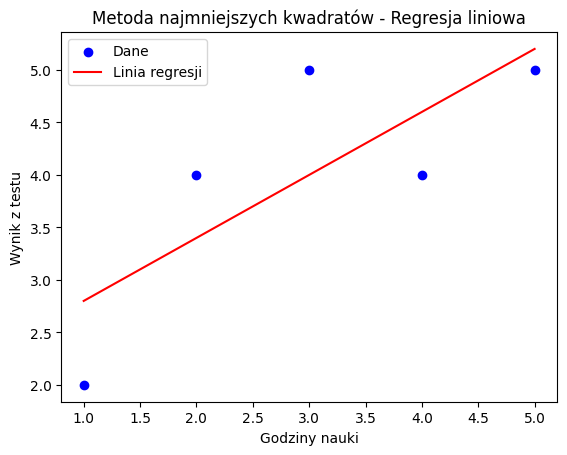

In [ ]:
# Dane wejściowe: godziny nauki (x) i wyniki testu (y)
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])

# Tworzenie macierzy projektującej X (dodajemy kolumnę jedynek)
X = np.vstack((x, np.ones(len(x)))).T

# Obliczanie współczynników metodą najmniejszych kwadratów
# beta = (X^T X)^(-1) X^T y
beta = np.linalg.inv(X.T @ X) @ X.T @ y

# Wyodrębnienie parametrów a (nachylenie) i b (wyraz wolny)
a, b = beta

print(f"Nachylenie (a): {a}")
print(f"Wyraz wolny (b): {b}")

# Rysowanie wykresu danych i dopasowanej linii regresji
plt.scatter(x, y, color='blue', label='Dane')
plt.plot(x, a * x + b, color='red', label='Linia regresji')
plt.xlabel('Godziny nauki')
plt.ylabel('Wynik z testu')
plt.legend()
plt.title('Metoda najmniejszych kwadratów - Regresja liniowa')
plt.show()

In [ ]:
# Obliczanie reszt (błędów) modelu
residuals = y - (a * x + b)

# Obliczanie wariancji reszt
residual_variance = np.var(residuals, ddof=2)

# Obliczanie macierzy kowariancji parametrów
XTX_inv = np.linalg.inv(X.T @ X)
param_covariance_matrix = residual_variance * XTX_inv

# Błędy standardowe parametrów a i b
param_errors = np.sqrt(np.diag(param_covariance_matrix))

error_a, error_b = param_errors

error_a, error_b

(np.float64(0.28284271247461895), np.float64(0.9380831519646857))

In [ ]:
# Obliczanie współczynnika korelacji Pearsona z macierzy projektującej X i wektora y
# Współczynnik korelacji Pearsona: r = cov(X, y) / (std(X) * std(y))

# Obliczanie średnich
mean_x = np.mean(x)
mean_y = np.mean(y)

# Obliczanie kowariancji
cov_xy = np.sum((x - mean_x) * (y - mean_y)) / (len(x) - 1)

# Obliczanie odchyleń standardowych
std_x = np.std(x, ddof=1)
std_y = np.std(y, ddof=1)

# Obliczanie współczynnika korelacji Pearsona
pearson_coefficient = cov_xy / (std_x * std_y)

pearson_coefficient

np.float64(0.7745966692414834)

# Zadanie 1

Wykorzystując `np.random.normal`, wygeneruj dane testowe (1000 punktów na płaszczyźnie w zależnosci liniowej między x i y) , do których zastosuj metodę najmniejszych kwadratów (możesz użyć **stats.linregres, scipy.optimize.curve_fit, numpy.polyfit**).
- Znajdź parametry prostej $y = a \cdot x + b$ .


Parametry prostej:
a: 4.00, b: 7.16


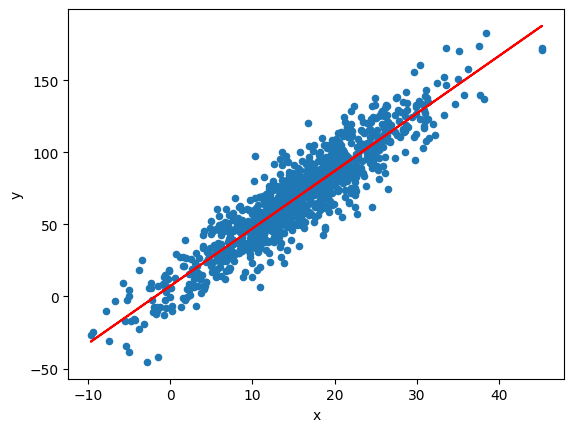

In [14]:
np.random.seed(25)
n = 1000
x = np.random.normal(15, 8, n)
y_true = 4 * x + 7
noise = np.random.normal(0, 14, n)
y = y_true + noise
frame = pd.DataFrame({
    'x': x,
    'y': y
})
a, b, r_value, p_value, std_err = stats.linregress(frame.x, frame.y)
print(f"Parametry prostej:\na: {a:.2f}, b: {b:.2f}")
fig, ax = plt.subplots()
frame.plot(kind="scatter", x='x', y='y', ax=ax)
y_linreg = a * x + b
ax.plot(x, y_linreg, 'r-')

# Zadanie 2

Wczytaj dane z pliku **LungDisease.csv** do DataFrame za pomocą biblioteki `pandas`. Dane te zawierają informacje o liczbie lat, przez które pracownik był narażony na pył bawełniany (**Exposure**), oraz o miarze pojemności płuc (**PEFR** - szczytowy przepływ wydechowy).

- Następnie, używając biblioteki matplotlib lub seaborn, stwórz wykres punktowy, na którym na osi x znajdzie się zmienna **Exposure**, a na osi y zmienna **PEFR**.

- Po stworzeniu wykresu, oblicz współczynnik korelacji Pearsona między **Exposure** a **PEFR**, aby ilościowo określić siłę i kierunek zależności między tymi zmiennymi.

- Na koniec, dopasuj prostą regresji liniowej do danych, aby zobaczyć, jak **PEFR** zmienia się w zależności od **Exposure**. Wyświetl wykres z dopasowaną prostą regresji

- Zastanów się, czy na wykresie punktowym widać wyraźny trend lub wzorzec. Czy PEFR rośnie czy maleje wraz z Exposure? Czy są jakieś odstające punkty lub nietypowe dane?

współczynnik korelacji Pearsona: -0.27702170106840723


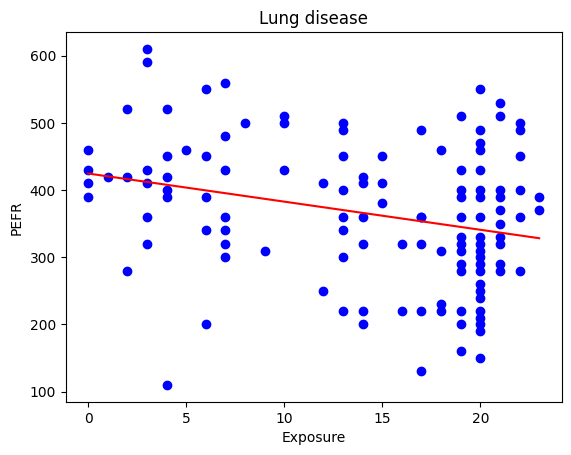

Na wykresie widać niewielki spadek średniej wartości PEFR wraz ze wzrostem Exposure.
Na wykresie widać też odstające punkty w okolicach PEFR = 600 i PEFR między 100 a ~150.


In [52]:
frame = pd.read_csv('LungDisease (1).csv')
exposure = frame['Exposure']
pefr = frame['PEFR']

mean_exposure = np.mean(exposure)
mean_pefr = np.mean(pefr)
cov_exposure_perf = np.sum((exposure - mean_exposure) * (pefr - mean_pefr))/(len(exposure) - 1)

std_exposure = np.std(exposure, ddof=1)
std_pefr = np.std(pefr, ddof=1)

pearson_coefficient = cov_exposure_perf / (std_exposure * std_pefr)

print(f"współczynnik korelacji Pearsona: {pearson_coefficient}")

a = np.sum((exposure - mean_exposure) * (pefr - mean_pefr))/np.sum((exposure - mean_exposure)**2)
b = mean_pefr - a * mean_exposure

plt.scatter(exposure, pefr, color="blue")
pefr_linreg = a * exposure + b
plt.plot(exposure, pefr_linreg, 'r-')
plt.ylabel("PEFR")
plt.xlabel("Exposure")
plt.title("Lung disease")
plt.show()

print("Na wykresie widać niewielki spadek średniej wartości PEFR wraz ze wzrostem Exposure.")
print("Na wykresie widać też odstające punkty w okolicach PEFR = 600 i PEFR między 100 a ~150.")

# Zadanie 3

1. **Wczytaj dane:**
   - Wczytaj dane z pliku `anscombe.csv` do DataFrame za pomocą biblioteki `pandas`.
   - Przekształć dane, aby miały format:

     ```
         x1    y1    x2    y2    x3     y3   x4    y4
     0  10.0  8.04  10.0  9.14  10.0   7.46  8.0  6.58
     1   8.0  6.95   8.0  8.14   8.0   6.77  8.0  5.76
     ```

2. **Stwórz wykresy punktowe:**
   - Użyj biblioteki `matplotlib` lub `seaborn`, aby stworzyć wykresy.
   - Na każdej osi (`ax`) umieść wykres punktowy dla par `x1, y1`, `x2, y2`, `x3, y3` oraz `x4, y4`.

3. **Dopasuj funkcje liniowe:**
   - Dla każdej pary `x1, y1`, `x2, y2`, `x3, y3` oraz `x4, y4` dopasuj funkcję liniową w postaci $y = a \cdot x + b$.
   - Oblicz współczynniki `a` i `b` wraz z błędami dla każdej pary.

4. **Oblicz współczynnik korelacji:**
   - Oblicz współczynnik korelacji Pearsona dla każdej pary `x1, y1`, `x2, y2`, `x3, y3` oraz `x4, y4`.



      x1     y1    x2    y2    x3     y3    x4     y4
0   10.0   8.04  10.0  9.14  10.0   7.46   8.0   6.58
1    8.0   6.95   8.0  8.14   8.0   6.77   8.0   5.76
2   13.0   7.58  13.0  8.74  13.0  12.74   8.0   7.71
3    9.0   8.81   9.0  8.77   9.0   7.11   8.0   8.84
4   11.0   8.33  11.0  9.26  11.0   7.81   8.0   8.47
5   14.0   9.96  14.0  8.10  14.0   8.84   8.0   7.04
6    6.0   7.24   6.0  6.13   6.0   6.08   8.0   5.25
7    4.0   4.26   4.0  3.10   4.0   5.39  19.0  12.50
8   12.0  10.84  12.0  9.13  12.0   8.15   8.0   5.56
9    7.0   4.82   7.0  7.26   7.0   6.42   8.0   7.91
10   5.0   5.68   5.0  4.74   5.0   5.73   8.0   6.89
Funkcja liniowa dla x1, y1: y = 0.5000909090909091 * x + 3.0000909090909103
Błąd a = 0.11790550059563404, błąd b = 1.1247467908086435
współczynnik korelacji Pearsona: 0.8164205163448399

Funkcja liniowa dla x2, y2: y = 0.49999999999999994 * x + 3.000909090909091
Błąd a = 0.11796374596764075, błąd b = 1.1253024162452268
współczynnik korelacji Pearsona

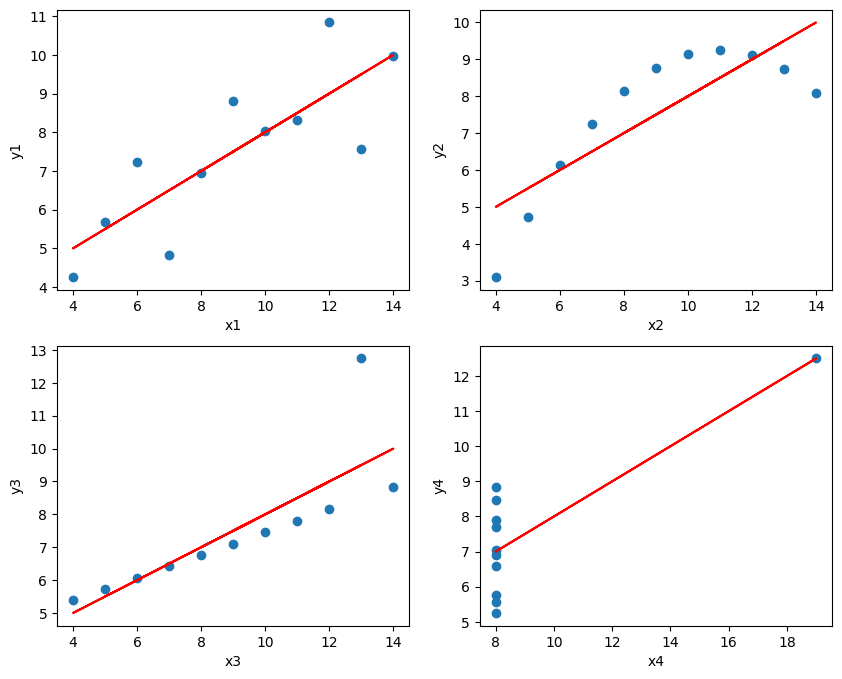

In [60]:
frame = pd.read_csv('anscombe (1).csv', header=None, skiprows=2)
frame.columns = ['x1','y1','x2','y2','x3','y3','x4','y4']
print(frame)

def calculate_variables(x, y):
  mean_x = np.mean(x)
  mean_y = np.mean(y)
  a = np.sum((x - mean_x) * (y - mean_y))/np.sum((x - mean_x)**2)
  b = mean_y - a * mean_x
  residuals = y - (a * x + b)
  residual_variance = np.var(residuals, ddof=2)
  X = np.vstack((x, np.ones(len(x)))).T
  XTX_inv = np.linalg.inv(X.T @ X)
  param_covariance_matrix = residual_variance * XTX_inv
  param_errors = np.sqrt(np.diag(param_covariance_matrix))
  error_a, error_b = param_errors
  cov_x_y = np.sum((x - mean_x) * (y - mean_y))/(len(x) - 1)
  std_x = np.std(x, ddof=1)
  std_y = np.std(y, ddof=1)
  pearson_coefficient = cov_x_y / (std_x * std_y)
  return a, b, error_a, error_b, pearson_coefficient

fig, ax = plt.subplots(2, 2, figsize=(10, 8))
ax[0, 0].scatter(frame['x1'], frame['y1'])
ax[0, 0].set_xlabel("x1")
ax[0, 0].set_ylabel("y1")
a, b, error_a, error_b, pearson_coefficient = calculate_variables(frame['x1'], frame['y1'])
ax[0, 0].plot(frame['x1'], a * frame['x1'] + b, 'r-')
print(f"Funkcja liniowa dla x1, y1: y = {a} * x + {b}")
print(f"Błąd a = {error_a}, błąd b = {error_b}")
print(f"współczynnik korelacji Pearsona: {pearson_coefficient}\n")

ax[0, 1].scatter(frame['x2'], frame['y2'])
ax[0, 1].set_xlabel("x2")
ax[0, 1].set_ylabel("y2")
a, b, error_a, error_b, pearson_coefficient = calculate_variables(frame['x2'], frame['y2'])
ax[0, 1].plot(frame['x2'], a * frame['x2'] + b, 'r-')
print(f"Funkcja liniowa dla x2, y2: y = {a} * x + {b}")
print(f"Błąd a = {error_a}, błąd b = {error_b}")
print(f"współczynnik korelacji Pearsona: {pearson_coefficient}\n")

ax[1, 0].scatter(frame['x3'], frame['y3'])
ax[1, 0].set_xlabel("x3")
ax[1, 0].set_ylabel("y3")
a, b, error_a, error_b, pearson_coefficient = calculate_variables(frame['x3'], frame['y3'])
ax[1, 0].plot(frame['x3'], a * frame['x3'] + b, 'r-')
print(f"Funkcja liniowa dla x3, y3: y = {a} * x + {b}")
print(f"Błąd a = {error_a}, błąd b = {error_b}")
print(f"współczynnik korelacji Pearsona: {pearson_coefficient}\n")

ax[1, 1].scatter(frame['x4'], frame['y4'])
ax[1, 1].set_xlabel("x4")
ax[1, 1].set_ylabel("y4")
a, b, error_a, error_b, pearson_coefficient = calculate_variables(frame['x4'], frame['y4'])
ax[1, 1].plot(frame['x4'], a * frame['x4'] + b, 'r-')
print(f"Funkcja liniowa dla x4, y4: y = {a} * x + {b}")
print(f"Błąd a = {error_a}, błąd b = {error_b}")
print(f"współczynnik korelacji Pearsona: {pearson_coefficient}\n")

